In [2]:
pip install scikit-learn;

Note: you may need to restart the kernel to use updated packages.


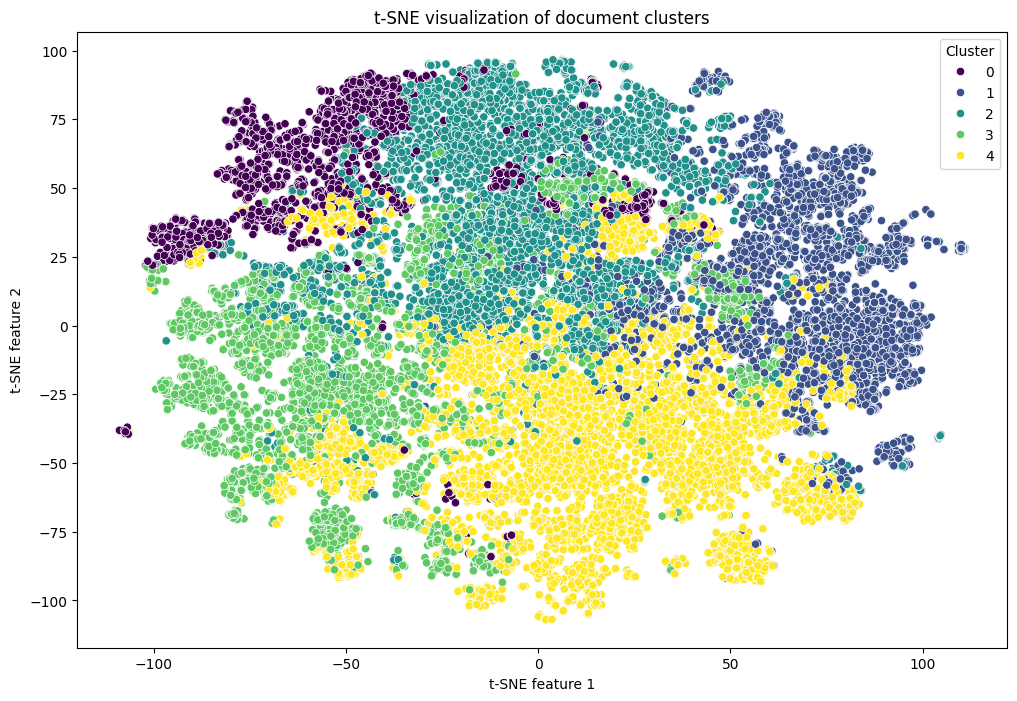

In [3]:
from datasets import load_dataset
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the saved arrow file
dataset = load_dataset('arrow', data_files='/Users/icon1c/Documents/Semester 2/Natural Language Processing/NLP-Polimi-Project/Practice Models/Rishabh/dataset/train/data-00000-of-00001.arrow')

# Convert to Pandas DataFrame for analysis
df = dataset['train'].to_pandas()

# Assuming 'input' is the column with text data
texts = df['input'].apply(lambda x: x.split()).tolist()

# Train Word2Vec model
model = Word2Vec(sentences=texts, vector_size=100, window=5, min_count=1, workers=4)

# Generate document embeddings by averaging word vectors
def document_vector(doc):
    # Remove out-of-vocabulary words and get the mean of the word vectors
    return np.mean([model.wv[word] for word in doc if word in model.wv.key_to_index], axis=0)

# Create document embeddings (you might need to exclude empty documents)
doc_embeddings = np.array([document_vector(doc) for doc in texts if len(doc) > 0])

# Clustering with K-means
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(doc_embeddings)

# Dimensionality reduction with t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(doc_embeddings)

# Plotting the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=clusters, palette='viridis')
plt.title('t-SNE visualization of document clusters')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.legend(loc='best', title='Cluster')
plt.show()


In [4]:
# Keyword Indexing: Create a simple inverted index for keyword search
from collections import defaultdict

# Create an inverted index mapping keyword to document index
inverted_index = defaultdict(list)

for idx, doc in enumerate(texts):
    for word in set(doc):
        inverted_index[word].append(idx)

# Function to perform keyword search
def search_keyword(keyword):
    return [df.iloc[idx]['input'] for idx in inverted_index[keyword]]

# Example usage: search for documents containing the word 'medicine'
search_results = search_keyword('medicine')
print(search_results[:10])  # Display the first 10 results

['What is the use of α antagonists (such as phentolamine) in medicine and what condition can they be used to treat?', 'What is a commonly used term in respiratory medicine to describe the characteristic sound associated with croup, which is caused by a parainfluenza infection and affects the larynx, trachea, and bronchi?', 'Should a patient be allowed to try alternative or holistic medicine that is known to be safe?']


In [5]:
# Exploring Word Embeddings
print("Most similar to 'medicine':", model.wv.most_similar('medicine', topn=5))
print("Most similar to 'production':", model.wv.most_similar('production', topn=5))

# Perform vector arithmetic: (king - man + woman = queen)
# Depending on your dataset, you might need to change these words to those that are present in your vocabulary.
try:
    print("King - Man + Woman analogy:", model.wv.most_similar(positive=['king', 'woman'], negative=['man'], topn=1))
except KeyError as e:
    print(e)

# Visualizing Word Embeddings using t-SNE
words = list(model.wv.index_to_key)
word_vectors = np.array([model.wv[word] for word in words])

# Dimensionality reduction with t-SNE
tsne = TSNE(n_components=2, random_state=42)
word_vectors_reduced = tsne.fit_transform(word_vectors)

# Plotting the word embeddings
plt.figure(figsize=(12, 8))
sns.scatterplot(x=word_vectors_reduced[:, 0], y=word_vectors_reduced[:, 1], alpha=0.5)
plt.title('t-SNE visualization of word embeddings')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')

# Annotating a subset of words to keep the plot readable
for i, word in enumerate(words):
    if np.random.random() < 0.1:  # Annotate roughly 10% of the words
        plt.annotate(word, xy=(word_vectors_reduced[i, 0], word_vectors_reduced[i, 1]), alpha=0.7)

plt.show()

Most similar to 'medicine': [('prevent?', 0.7248410582542419), ('gastroparesis?', 0.653704047203064), ('"golfer\'s', 0.6499955654144287), ('interview?', 0.6451044082641602), ('"uni-lateral"', 0.6218756437301636)]


KeyError: "Key 'doctor' not present in vocabulary"